# Models and Estimation II

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore', FutureWarning) # Seaborn triggers warnings in scipy
%matplotlib inline

In [3]:
# Configure nice plotting defaults - (this must be done in a cell separate
# from %matplotlib call)
plt.style.use('seaborn')
sns.set_context('talk', font_scale=1.4)
plt.rcParams['figure.figsize'] = (10, 7)

We're also going to use plotly for interactive plots.

In [10]:
import plotly.offline as py
py.init_notebook_mode(connected=True) # True if online -> smaller notebooks without plotly.js

import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as cf

cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

## Review of Last Time

In [418]:
data = [5, 7, 8, 9]

In [419]:
def abs_loss(est, y_obs):
    return np.abs(y_obs - est)

In [420]:
def squared_loss(est, y_obs):
    return (est - y_obs)**2

In [421]:
def avg_absolute_loss(est, data):
    return np.mean(np.array([abs_loss(est, y_obs) for y_obs in data]), axis=0)

In [422]:
def avg_squared_loss(est, data):
    return np.mean(np.array([squared_loss(est, y_obs) for y_obs in data]), axis=0)

In [423]:
avg_absolute_loss(8, data)

1.25

In [424]:
avg_squared_loss(8, data)

2.75

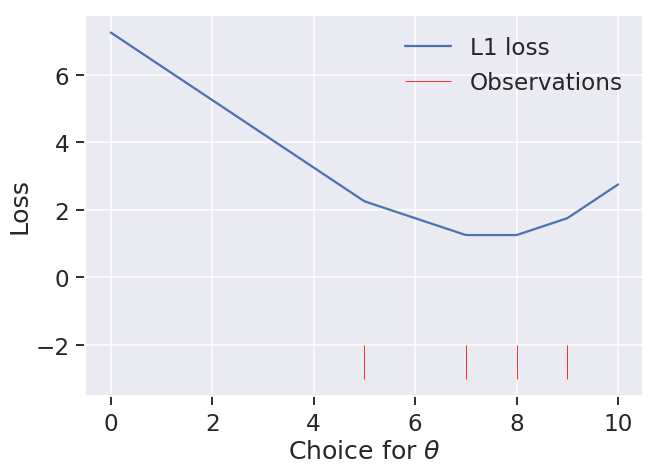

In [425]:
thetas = np.linspace(0, 10, 200)
loss = avg_absolute_loss(thetas, data)
plt.plot(thetas, loss, label="L1 loss")
plt.vlines(data, -3, -2, colors="r", linewidth=0.8, label="Observations")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend()
plt.savefig("l9_abs_loss.png", dpi=300)

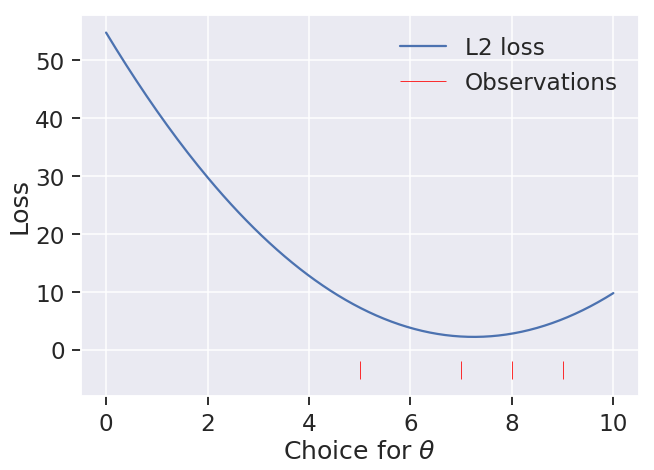

In [426]:
thetas = np.linspace(0, 10, 200)
loss = avg_squared_loss(thetas, data)
plt.plot(thetas, loss, label = "L2 loss")
plt.vlines(data, -5, -2, colors="r", linewidth=0.8, label="Observations")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend()
plt.savefig("l9_squared_loss.png", dpi=300)


For the L2 loss, a single outlier can cause huge changes in the optimal theta.

In [427]:
data2 = [5, 7, 8, 9, 100]

In [428]:
np.mean(data2)

25.800000000000001

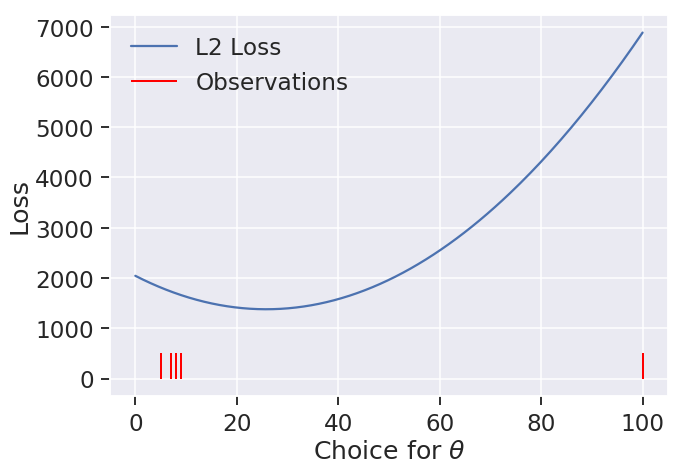

In [429]:
thetas = np.linspace(0, 100, 200)
loss = avg_squared_loss(thetas, data2)
plt.plot(thetas, loss, label="L2 Loss")
plt.vlines(data2, 0, 500, colors="r", linewidth=2, label="Observations")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend()
plt.savefig("l9_squared_loss_outlier.png", dpi=300)

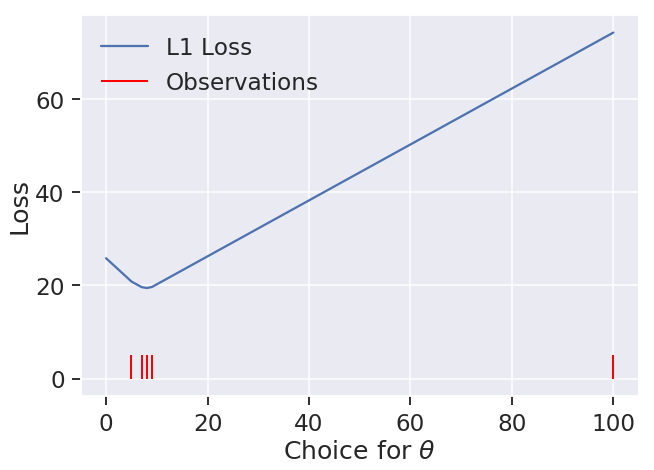

In [430]:
thetas = np.linspace(0, 100, 200)
loss = avg_absolute_loss(thetas, data2)
plt.plot(thetas, loss, label="L1 Loss")
plt.vlines(data2, 0, 5, colors="r", linewidth=2, label="Observations")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend()
plt.savefig("l9_absolute_loss_outlier.png", dpi=300)

In [431]:
def huber_loss(est, y_obs, alpha = 1):
    d = abs_loss(est, y_obs)
    return np.where(d < alpha, 
                    squared_loss(est, y_obs) / 2.0,
                    alpha * (d - alpha / 2.0))

In [432]:
def avg_huber_loss(est, data, alpha = 1):
    return np.mean(np.array([huber_loss(est, y_obs, alpha) for y_obs in data]), axis=0)

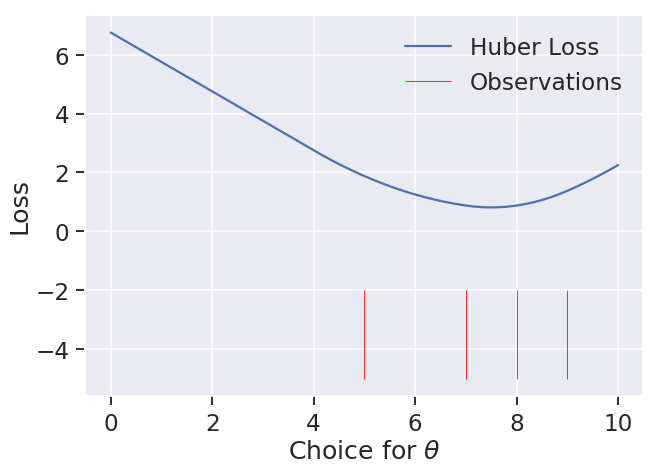

In [433]:
thetas = np.linspace(0, 10, 200)
loss = avg_huber_loss(thetas, data, 1)
plt.plot(thetas, loss, label="Huber Loss")
plt.vlines(data, -5, -2, colors="r", linewidth=0.8, label="Observations")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend()
#print("Minimizing Theta", thetas[np.argmin(loss)])
plt.savefig("l9_alpha1_huber_loss.png", dpi=300)

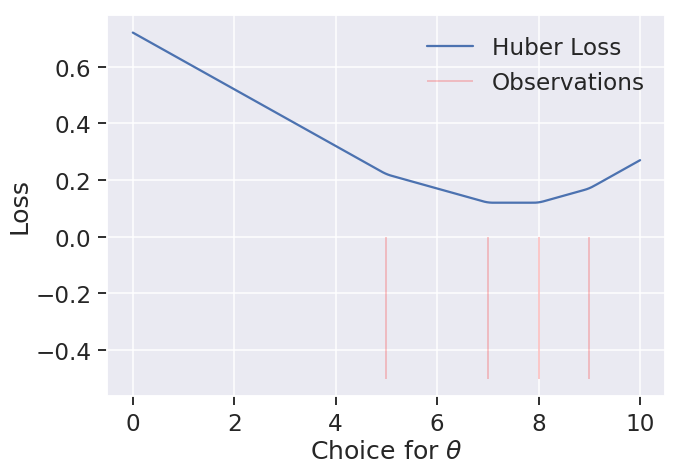

In [434]:
thetas = np.linspace(0, 10, 200)
loss = avg_huber_loss(thetas, data, 0.1)
plt.plot(thetas, loss, label="Huber Loss")
plt.vlines(data, -0.5, 0, colors="r", linewidth=0.4, label="Observations")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend()
#print("Minimizing Theta", thetas[np.argmin(loss)])
plt.savefig("l9_alphapt1_huber_loss.png", dpi=300)

## Huber Loss Minimization

---
<br/><br/><br/> 

# Minimizing the Average Huber Loss Analytically 

Recall that the Huber loss has the form:

$$\Large
f(\theta) =\frac{1}{n}\sum_{i=1}^n 
\begin{cases} 
      \frac{1}{2}\left( y_i - \theta \right)^2 & \left| y_i - \theta \right| < \alpha \\
       \alpha \left(\left| y_i - \theta  \right| - \frac{\alpha}{2} \right) & \text{otherwise}
\end{cases}
$$

Taking the derivative we get:

$$\Large
\frac{\partial}{\partial \theta} f(\theta) =\frac{1}{n}\sum_{i=1}^n 
\begin{cases} 
      -\left(y_i - \theta  \right) & \left| \theta - y_i \right| < \alpha \\
        -\alpha  \, \textbf{sign}(y_i - \theta) & \text{otherwise}
\end{cases}
$$

Unfortunately this is difficult to solve analytically. However we can get a plot of what the derivative looks like


### Derivative at a single point

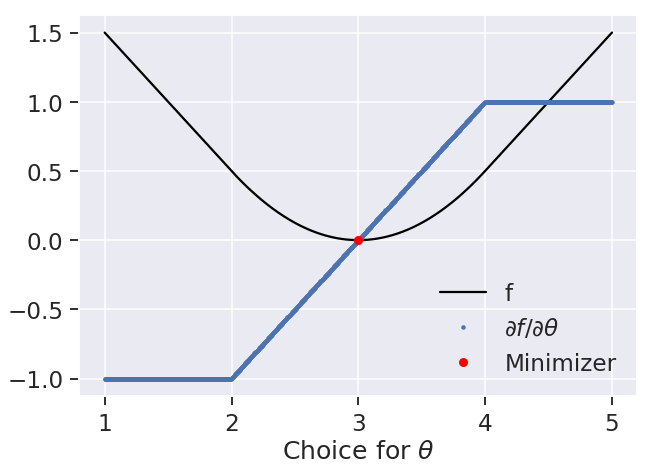

In [435]:
alpha =1.0
f = lambda theta: huber_loss(theta, 3, alpha = alpha)

def huber_loss_derivative_single(est, y_obs, alpha=1):
    d = abs_loss(est, y_obs)
    return np.where(d < alpha, 
                    est - y_obs,
                    alpha * np.sign(est-y_obs))

df = lambda theta: huber_loss_derivative_single(theta, 3.0, alpha=alpha)
thetas = np.linspace(1, 5, 1000)
plt.plot(thetas, f(thetas), 'k', label="f")
plt.plot(thetas, df(thetas), '.', label=r"$\partial f / \partial \theta$")
# plt.plot(thetas, ddf(thetas), '--', label=r"$\partial^2 f / \partial \theta^2$")
plt.plot([3],[0], 'ro', label="Minimizer")
plt.xlabel(r'Choice for $\theta$')
plt.legend(); 

### Derivative on 4 test points. 

For this example, we'll use datasets [5, 10, 30, 40], and [5, 10, 20, 30, 40]. Notice that for the default $\alpha=1$ alpha value the curves look similar to the absolute loss but with smooth corners.

Minimizing Theta 7.47487437186


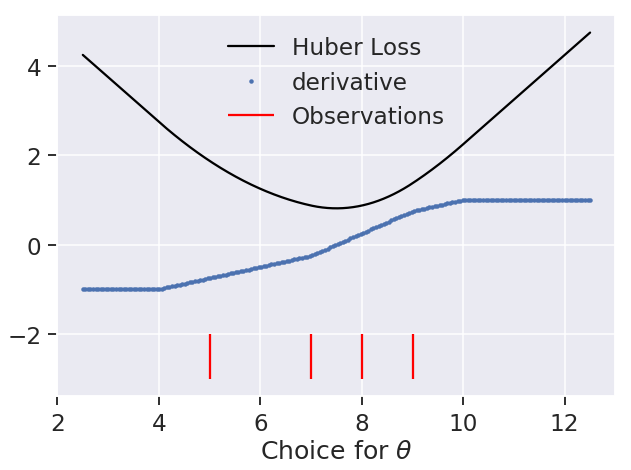

In [436]:
def huber_loss_derivative(est, data, alpha = 1):
    return np.mean(huber_loss_derivative_single(est, data, alpha))
    
thetas = np.linspace(2.5, 12.5, 200)
alpha = 1
plt.plot(thetas, avg_huber_loss(thetas, data, alpha), '-k', label="Huber Loss")
plt.plot(thetas, [huber_loss_derivative(u, data, alpha) for u in thetas], '.', label='derivative')
plt.vlines(data, -3, -2, colors="r", label="Observations")
plt.xlabel(r'Choice for $\theta$')
print("Minimizing Theta", thetas[np.argmin(avg_huber_loss(thetas, data, alpha))])
plt.legend(loc=9)
plt.savefig('l9_huber_4_pt_large_alpha.png', dpi=300)

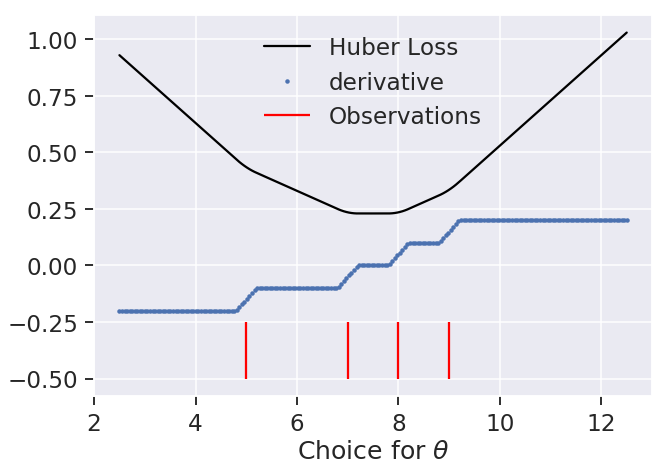

In [437]:
thetas = np.linspace(2.5, 12.5, 200)
alpha = 0.2
plt.plot(thetas, avg_huber_loss(thetas, data, alpha), '-k', label="Huber Loss")
plt.plot(thetas, [huber_loss_derivative(u, data, alpha) for u in thetas], '.', label='derivative')
plt.vlines(data, -0.5, -0.25, colors="r", label="Observations")
plt.xlabel(r'Choice for $\theta$')
plt.legend(loc=9)
#plt.savefig('l9_huber_4_pt_small_alpha.png', dpi=300)

Maybe add another example with 5 test points to show that solution is unique for arbitrarily small alpha.

# Numerical Minimization

## Brute Force

We can also attempt to minimize our loss functions numerically instead of graphically. A very slow and terrible way would be manual guess-and-check.

In [438]:
data = np.array([5, 7, 8, 9])

In [439]:
avg_squared_loss(4, data)

12.75

In [440]:
avg_squared_loss(7, data)

2.25

A somewhat better approach is to use brute force to try out a bunch of thetas and return the one that yields the lowest loss.

In [441]:
def simple_minimize(loss_fn, observations, thetas):
    losses = [loss_fn(theta, observations) for theta in thetas]  
    return thetas[np.argmin(losses)]

In [442]:
simple_minimize(avg_squared_loss, data, np.linspace(0, 10, 20))

7.3684210526315788

Visually, what we're doing is computing all the starred values below and then returning the $\theta$ that goes with the minimum value.

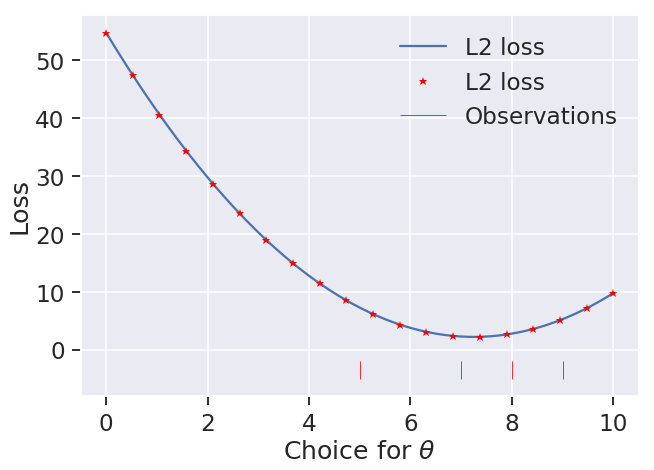

In [443]:
thetas = np.linspace(0, 10, 200)
sparse_thetas = np.linspace(0, 10, 20)

loss = avg_squared_loss(thetas, data)
sparse_loss = avg_squared_loss(sparse_thetas, data)

plt.plot(thetas, loss, label = "L2 loss")
plt.plot(sparse_thetas, sparse_loss, 'r*', label = "L2 loss")
plt.vlines(data, -5, -2, colors="r", linewidth=0.8, label="Observations")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend()
plt.savefig("l9_brute_force.png", dpi=300)

From our calculus based approach above, we know the actual answer is simply the mean of the data.

In [444]:
np.mean(data)

7.25

Note that `simple_minimize` off by a bit, and this is simply because the exact value 7.25 wasn't one of the guesses we tried.

We can repeat this same process to minimize the huber loss for our data set.

In [445]:
avg_huber_alpha_one = lambda theta, data: avg_huber_loss(theta, data, 1)
simple_minimize(avg_huber_alpha_one, data, np.linspace(0, 10, 10000))

7.4997499749975001

Or visually:

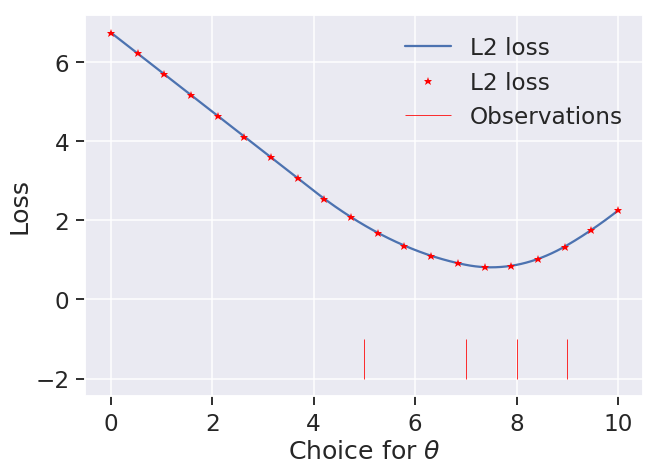

In [446]:
thetas = np.linspace(0, 10, 200)
sparse_thetas = np.linspace(0, 10, 20)

loss = avg_huber_alpha_one(thetas, data)
sparse_loss = avg_huber_alpha_one(sparse_thetas, data)

plt.plot(thetas, loss, label = "L2 loss")
plt.plot(sparse_thetas, sparse_loss, 'r*', label = "L2 loss")
plt.vlines(data, -2, -1, colors="r", linewidth=0.8, label="Observations")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend()
plt.savefig("l9_brute_force.png", dpi=300)

This basic approach is incredibly inefficient, and suffers from two major flaws:
1. If the minimum is outside our range of guesses, the answer will be completely wrong.
2. Even if our range of gueseses is correct, if the guesses are too coarse, our answer will be inaccurate.

In [447]:
simple_minimize(avg_huber_alpha_one, data, np.linspace(0, 3, 10000))

3.0

In [448]:
simple_minimize(avg_huber_alpha_one, data, np.linspace(0, 1000, 100))

10.1010101010101

## Gradient Descent

Instead of choosing all of our guesses ahead of time, we can instead start from a single guess and try to iteratively improve on our loss. 

They key insight is this: Given that our loss functions are convex, we know that the derivative of the loss is always negative to the left of the solution, and always positive to the right of the solution.

Thus, the derivative tells us which way to go.

Minimizing Theta 7.47487437186


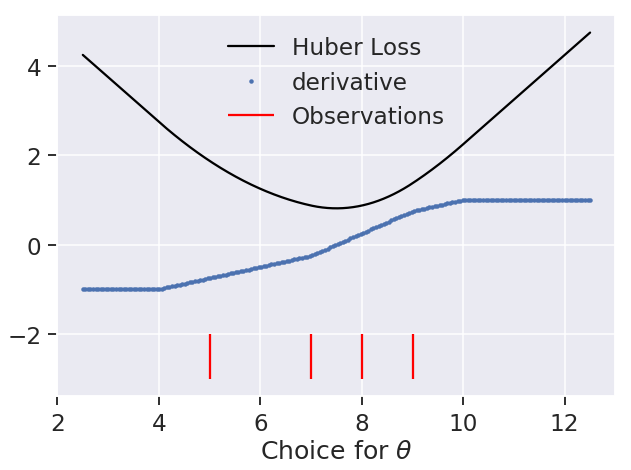

In [451]:
thetas = np.linspace(2.5, 12.5, 200)
alpha = 1
plt.plot(thetas, avg_huber_loss(thetas, data, alpha), '-k', label="Huber Loss")
plt.plot(thetas, [huber_loss_derivative(u, data, alpha) for u in thetas], '.', label='derivative')
plt.vlines(data, -3, -2, colors="r", label="Observations")
plt.xlabel(r'Choice for $\theta$')
print("Minimizing Theta", thetas[np.argmin(avg_huber_loss(thetas, data, alpha))])
plt.legend(loc=9)

In [452]:
huber_loss_derivative(0, data, 1)

-1.0

Since the derivative above is negative, we should go to the right.

In [453]:
huber_loss_derivative(4, data, 1)

-1.0

In [454]:
huber_loss_derivative(6, data, 1)

-0.5

In [455]:
huber_loss_derivative(9, data, 1)

0.75

In [456]:
huber_loss_derivative(8, data, 1)

0.25

In [457]:
huber_loss_derivative(7.5, data, 1)

0.0

Gradient descent is a more intelligent process than the one we did above. In particular, gradient descent creates its next guess based not only on the sign of the slope, but also its magnitude. Let's try the most naive possible approach and simply add the slope to our current guess, i.e.

$$
\theta^{(t+1)} = \theta^{(t)} - \frac{\partial}{\partial \theta} L(\theta^{(t)}, \textbf{y})
$$

Where $ \theta^{(t)} $ is the current estimate and $ \theta^{(t+1)} $ is the next estimate.

In [458]:
huber_loss_derivative(5, data, 1)

-0.75

In [459]:
huber_loss_derivative(5.75, data, 1)

-0.5625

In [460]:
huber_loss_derivative(6.3125, data, 1)

-0.421875

In [461]:
huber_loss_derivative(6.734375, data, 1)

-0.31640625

In [462]:
huber_loss_derivative(7.05078125, data, 1)

-0.224609375

In [463]:
huber_loss_derivative(7.275390625, data, 1)

-0.1123046875

In [464]:
huber_loss_derivative(7.3876953125, data, 1)

-0.05615234375

In [465]:
huber_loss_derivative(7.44384765625, data, 1)

-0.028076171875

In [466]:
huber_loss_derivative(7.471923828125, data, 1)

-0.0140380859375

In [467]:
def gradient_descent_v1(df, initial_guess, n):
    guesses = [initial_guess]
    guess = initial_guess
    while len(guesses) < n:
        guess = guess - df(guess)
        guesses.append(guess)
    return np.array(guesses)

In [468]:
hld_example = lambda theta: huber_loss_derivative(theta, data, 1)

In [469]:
gradient_descent_v1(hld_example, 5, 50)

array([ 5.        ,  5.75      ,  6.3125    ,  6.734375  ,  7.05078125,
        7.27539062,  7.38769531,  7.44384766,  7.47192383,  7.48596191,
        7.49298096,  7.49649048,  7.49824524,  7.49912262,  7.49956131,
        7.49978065,  7.49989033,  7.49994516,  7.49997258,  7.49998629,
        7.49999315,  7.49999657,  7.49999829,  7.49999914,  7.49999957,
        7.49999979,  7.49999989,  7.49999995,  7.49999997,  7.49999999,
        7.49999999,  7.5       ,  7.5       ,  7.5       ,  7.5       ,
        7.5       ,  7.5       ,  7.5       ,  7.5       ,  7.5       ,
        7.5       ,  7.5       ,  7.5       ,  7.5       ,  7.5       ,
        7.5       ,  7.5       ,  7.5       ,  7.5       ,  7.5       ])

In [470]:
def squared_loss_derivative_single(est, y_obs):
    return 2*(est - y_obs)
    
def squared_loss_derivative(est, data):
    return np.mean(squared_loss_derivative_single(est, data))    

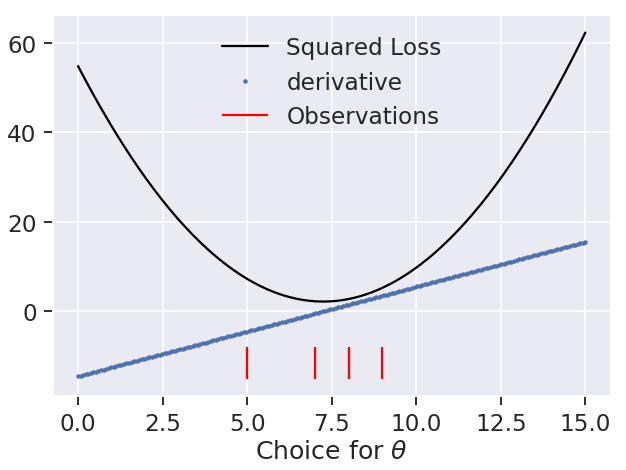

In [471]:
thetas = np.linspace(0, 15, 200)
plt.plot(thetas, avg_squared_loss(thetas, data), '-k', label="Squared Loss")
plt.plot(thetas, [squared_loss_derivative(u, data) for u in thetas], '.', label='derivative')
plt.vlines(data, -15, -8, colors="r", label="Observations")
plt.xlabel(r'Choice for $\theta$')
plt.legend(loc=9)
plt.savefig("l9_squared_loss_derivative.png", dpi=300)

In [472]:
squared_loss_derivative(0, data)

-14.5

In [473]:
squared_loss_derivative(14.5, data)

14.5

In [474]:
sld_example = lambda theta: squared_loss_derivative(theta, data)
gradient_descent_v1(sld_example, 0, 10)

array([  0. ,  14.5,   0. ,  14.5,   0. ,  14.5,   0. ,  14.5,   0. ,  14.5])

In [81]:
def gradient_descent_v2(df, initial_guess, n, alpha):
    guesses = [initial_guess]
    guess = initial_guess
    while len(guesses) < n:
        #print(alpha * df(guess))
        guess = guess - alpha * df(guess)
        guesses.append(guess)
    return np.array(guesses)

In [476]:
sld_example = lambda theta: squared_loss_derivative(theta, data)
gradient_descent_v2(sld_example, 0, 10, 0.4)

-5.8
-1.16
-0.232
-0.0464
-0.00928
-0.001856
-0.0003712
-7.424e-05
-1.4848e-05


array([ 0.        ,  5.8       ,  6.96      ,  7.192     ,  7.2384    ,
        7.24768   ,  7.249536  ,  7.2499072 ,  7.24998144,  7.24999629])

Note that we have not discussed how to decide when gradient descent is done. We'll leave this for you to learn a later time.

Function optimization is such a common problem that tools have been written to do all this work for us. For example, `scipy` provides us with the relatively user friendly `scipy.optimize.minimize` function.

All we have to do is provide the function, the deriviative of the function, and a starting guess, and it will use the gradient to find the solution. Note, the actual algorithm used by `minimize` is something more sophisticated than gradient descent called BFGS that we will not discuss in our course.

In [520]:
def squared_loss_derivative(ests, data):
    return np.array([np.mean(squared_loss_derivative_single(est, data)) for est in ests])

from scipy.optimize import minimize
data = np.array([5, 7, 8, 9])
f = lambda theta: avg_squared_loss(theta, data)
df = lambda theta: squared_loss_derivative(theta, data)
minimize(f, 0.0, jac=df)

      fun: 2.1875
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ 7.25])

Strictly speaking, minimize doesn't need the derivative, though you're likely to get better and faster results if you provide it.

In [521]:
minimize(f, 0.0)

      fun: 2.187500000000008
 hess_inv: array([[ 0.49999999]])
      jac: array([ -1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ 7.24999991])

## Multi Dimensional Models

In [4]:
#tips datset
data = sns.load_dataset("tips")
data['pcttip'] = data['tip']/data['total_bill'] * 100
data.head()

total_bill   tip     sex smoker  day    time  size     pcttip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765

# Improving the Model

So far we have taken a very simple model that the percentage tip is constant:

$$\Large
\text{percentage tip} = \theta
$$

We then defined several loss functions and used those to estimate the value of $\theta$.  How can we improve this model? Recall that we do have additional information:

In [5]:
data.head()

total_bill   tip     sex smoker  day    time  size     pcttip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765

One idea is to model the tip as having a linear dependence on the total bill size.

$\texttt{percentage tip} = \theta_1 + \theta_2 * \texttt{total bill}$

This idea is supported by the plot below.

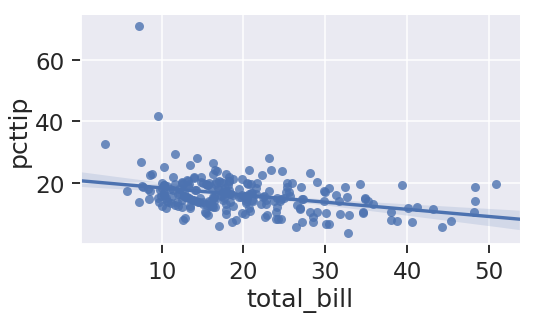

In [6]:
sns.lmplot(x = "total_bill", y = "pcttip", data = data, aspect=1.6)
plt.savefig("ptip_total_bill.pdf")

In [7]:
# We can implement this model as below
def f(theta, total_bill):
    return theta[0] + theta[1] * total_bill

In [8]:
def squared_loss(est, y_obs):
    return (est - y_obs)**2

def abs_loss(est, y_obs):
    return np.abs(y_obs - est)

def huber_loss(est, y_obs, alpha = 1):
    d = abs_loss(est, y_obs)
    return np.where(d < alpha, 
                    squared_loss(est, y_obs) / 2.0,
                    alpha * (d - alpha / 2.0))

#We can define our l1, l2, and huber loss functions on tips as below.
def l1_tips(theta):
    return np.mean(abs_loss(f(theta, data['total_bill']), data['pcttip']).values)

def l2_tips(theta):
    return np.mean(squared_loss(f(theta, data['total_bill']), data['pcttip']).values)

def huber_tips(theta):
    return np.mean(huber_loss(f(theta, data['total_bill']), data['pcttip']))
#minimize(l1, np.array([0.0,0.0]))
#minimize(l2, np.array([0.0,0.0]))
#minimize(huber, np.array([0.0,0.0]))

In [18]:
# Make range of values for thetas
uvalues = np.linspace(16,22,70)
vvalues = np.linspace(-.5,0,70)
(u,v) = np.meshgrid(uvalues, vvalues)
thetas = np.vstack((u.flatten(),v.flatten()))


# res = {}

#replace first line with this to see all 3 loss functions
#for loss_name, loss in [("L1", l1_tips), ("L2", l2_tips), ("Huber", huber_tips)]:


for loss_name, loss in [("Huber", huber_tips)]:
    loss_values = np.array([loss(t) for t in thetas.T])
    
    loss_surface = go.Surface(name=loss_name,
            x=u, y=v, z=np.reshape(loss_values, u.shape),
            contours=dict(z=dict(show=True, color="gray", project=dict(z=True)))
        )

    scene=go.Scene(
            xaxis=go.XAxis(title='w0'),
            yaxis=go.YAxis(title='w1'),
            aspectratio=dict(x=2.,y=2., z=1.), 
    #         camera=dict(eye=dict(x=-2, y=-2, z=2))
        )

    layout = go.Layout(
        autosize=True,
        width=800,
        height=600,
        scene = scene
    )
    ind = np.argmin(loss_values)
    optimal_point = go.Scatter3d(name = "Optimal Point for " + loss_name,
        x = [thetas.T[ind,0]], y = [thetas.T[ind,1]], 
        z = [loss_values[ind]],
        marker=dict(size=10, color="red"))
    py.iplot(go.Figure(data=[loss_surface, optimal_point], layout = layout))

## Multi-Dimensional Gradient Descent

In [30]:
def fmgd(theta):
    return theta[0]**2 - 12*theta[0] + theta[1]**2 + 2*theta[1]
    
def gradient_fmgd(theta):
    dth1 = 2*theta[0] - 12
    dth2 = 2*theta[1] + 2
    return np.array([dth1, dth2])

In [91]:
# To visualize fmgd
uvalues = np.linspace(-5,15,100)
vvalues = np.linspace(-10,10,100)
(u,v) = np.meshgrid(uvalues, vvalues)
thetas = np.vstack((u.flatten(),v.flatten()))
z_values = np.array([fmgd(t) for t in thetas.T])

z_surface = go.Surface(name="z",
        x=u, y=v, z=np.reshape(z_values, u.shape),
        contours=dict(z=dict(show=True, color="gray", project=dict(z=True)))
    )

scene=go.Scene(
        xaxis=go.XAxis(title='theta0'),
        yaxis=go.YAxis(title='theta1'),
        aspectratio=dict(x=2.,y=2., z=1.), 
#         camera=dict(eye=dict(x=-2, y=-2, z=2))
    )

layout = go.Layout(
    autosize=True,
    width=800,
    height=600,
    scene = scene
)
ind = np.argmin(z_values)
optimal_point = go.Scatter3d(name = "Optimal Point",
    x = [thetas.T[ind,0]], y = [thetas.T[ind,1]], 
    z = [z_values[ind]], 
    marker=dict(size=10, color="red"))
py.iplot(go.Figure(data=[z_surface, optimal_point], layout = layout))

In [89]:
z_contour = go.Contour(name="fmgd",
        x=uvalues, y=vvalues, z=np.reshape(z_values, u.shape),
        colorscale='Viridis', reversescale=True
    )

py.iplot(go.Figure(data=[z_contour], layout = layout))

In [32]:
guess = np.array([0, 0])

In [31]:
gradient_fmgd([0, 0])

array([-12,   2])

In [34]:
gradient_fmgd(guess) + guess

array([-12,   2])

In [86]:
theta_path = gradient_descent_v2(gradient_fmgd, np.array([0, 0]), 100, 0.2)

In [88]:
theta_points = go.Scatter(name="Theta Values", x=theta_path[:,0], y=theta_path[:,1],
                          mode="lines+markers")

z_contour = go.Contour(name="fmgd",
        x=uvalues, y=vvalues, z=np.reshape(z_values, u.shape),
        colorscale='Viridis', reversescale=True
    )



py.iplot(go.Figure(data=[z_contour, theta_points], layout = layout))

Or using scipy's `minimize`:

In [52]:
from scipy.optimize import minimize
minimize(fmgd, np.array([0, 0]), jac=gradient_fmgd)

      fun: -37.0
 hess_inv: array([[ 0.51351351,  0.08108108],
       [ 0.08108108,  0.98648649]])
      jac: array([  0.00000000e+00,  -2.22044605e-15])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ 6., -1.])

## "Improving the Model"

We could get extra fancy and start trying to include additional features. 

$\texttt{percentage tip} = \theta_1 + \theta_2 * \texttt{is Male} + \theta_3 *\texttt{is Smoker} + \theta_4 * \texttt{table size}$

In [53]:
data.head()

total_bill   tip     sex smoker  day    time  size     pcttip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765

In [58]:
def f(theta, data):
    return (
        theta[0] + 
        theta[1] * (data['sex'] == 'Male') +
        theta[2] * (data['smoker'] == "Yes") +
        theta[3] * data['size']
    )

In [59]:
def l2(theta):
    return np.mean(squared_loss(f(theta, data), data['pcttip']).values)

minimize(l2, np.zeros(4))

      fun: 36.25888793122608
 hess_inv: array([[ 5.00852276, -1.03468734, -1.13297213, -1.36869473],
       [-1.03468734,  2.06166674,  0.00679159, -0.11857307],
       [-1.13297213,  0.00679159,  2.08462848,  0.14029876],
       [-1.36869473, -0.11857307,  0.14029876,  0.55080528]])
      jac: array([  3.81469727e-06,   3.33786011e-06,   4.76837158e-07,
         8.10623169e-06])
  message: 'Optimization terminated successfully.'
     nfev: 84
      nit: 13
     njev: 14
   status: 0
  success: True
        x: array([ 18.73866929,  -0.73513124,   0.16122391,  -0.87437012])

In [56]:
def l1(theta):
    return np.mean(abs_loss(f(theta, data), data['pcttip']).values)

minimize(l1, np.zeros(4))

      fun: 3.90957158852356
 hess_inv: array([[ 443.57329609, -215.55179077, -211.52560242, -109.7383045 ],
       [-215.55179077,  104.77953797,  102.80962477,   53.31466531],
       [-211.52560242,  102.80962477,  100.96345597,   52.31890909],
       [-109.7383045 ,   53.31466531,   52.31890909,   27.15457305]])
      jac: array([ 0.00750431,  0.00340596,  0.00340596,  0.01979941])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1104
      nit: 31
     njev: 182
   status: 2
  success: False
        x: array([ 18.02471408,  -0.72038142,  -0.9579457 ,  -0.77126898])

In [57]:
def huber(theta):
    return np.mean(huber_loss(f(theta, data), data['pcttip']))

minimize(huber, np.zeros(4))

      fun: 3.4476306812527757
 hess_inv: array([[ 77.24012512, -19.71060902, -26.073196  , -20.40690306],
       [-19.71060902,  20.85365616,   4.85116291,   2.01663757],
       [-26.073196  ,   4.85116291,  28.8990574 ,   5.65213441],
       [-20.40690306,   2.01663757,   5.65213441,   6.76874477]])
      jac: array([ -1.19209290e-07,  -8.94069672e-08,  -1.19209290e-07,
        -1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 150
      nit: 21
     njev: 25
   status: 0
  success: True
        x: array([ 18.53021329,  -0.90174037,  -0.87843472,  -0.84144212])

We could use the same loss framework as before and compute the best parameters for each model and then choose the model with the smallest average loss. 

_**Warning:** There are some issues with this approach that we will revisit later_